In [2]:
from sklearn.datasets import load_sample_image
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()  # for plot styling
import numpy as np

Loading image using OpenCV perturbs the original colors.

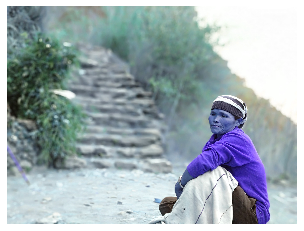

In [70]:
import cv2
myimg = cv2.imread('myphoto.jpg',cv2.IMREAD_UNCHANGED )
ax = plt.axes(xticks=[], yticks=[])
ax.imshow(myimg);

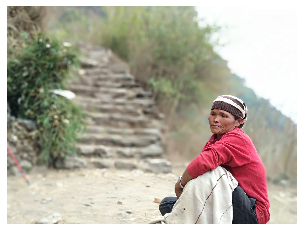

In [3]:
from skimage import io
myimg = io.imread('myphoto.jpg')
ax = plt.axes(xticks=[], yticks=[])
ax.imshow(myimg);

In [4]:
data = myimg / 255.0
data = data.reshape(-1, 3)
data.shape

(12000000, 3)

In [5]:
def plot_pixels(data, title, colors=None, N=100000):
    if colors is None:
        colors = data
    
    # choose a random subset
    rng = np.random.RandomState(0)
    i = rng.permutation(data.shape[0])[:N]
    colors = colors[i]
    R, G, B = data[i].T
    
    fig, ax = plt.subplots(1, 2, figsize=(16, 6))
    ax[0].scatter(R, G, color=colors, marker='.')
    ax[0].set(xlabel='Red', ylabel='Green', xlim=(0, 1), ylim=(0, 1))

    ax[1].scatter(R, B, color=colors, marker='.')
    ax[1].set(xlabel='Red', ylabel='Blue', xlim=(0, 1), ylim=(0, 1))

    fig.suptitle(title, size=20);

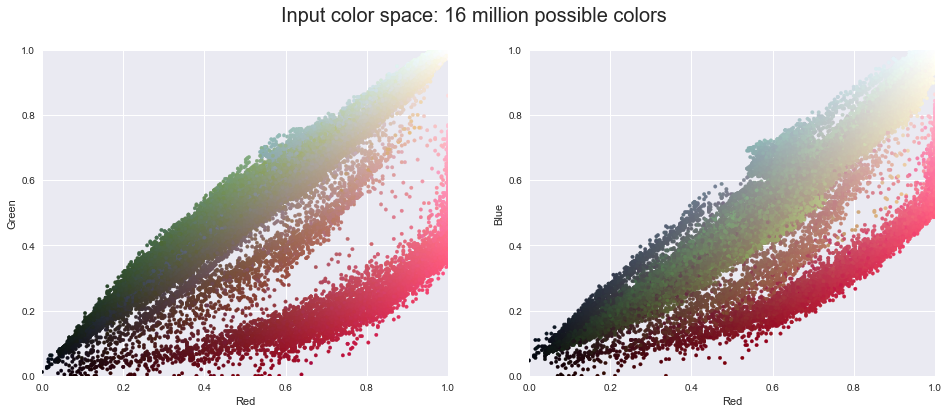

In [6]:
plot_pixels(data, title='Input color space: 16 million possible colors')

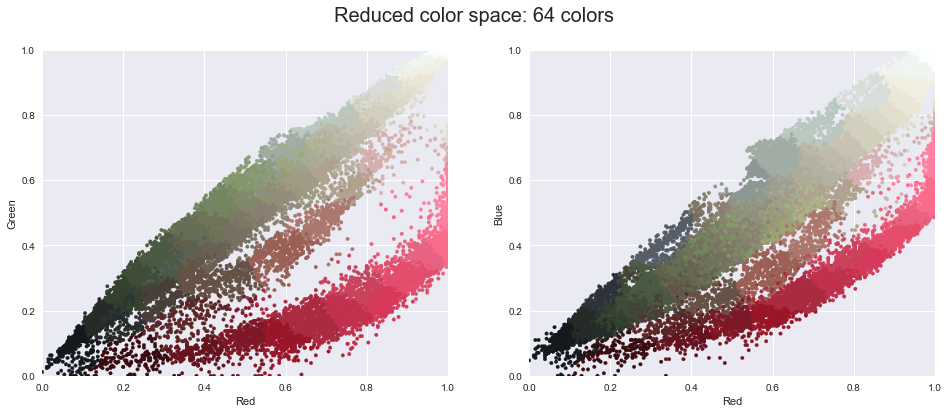

In [7]:
from sklearn.cluster import MiniBatchKMeans

kmeans = MiniBatchKMeans(64)
kmeans.fit(data)
new_colors = kmeans.cluster_centers_[kmeans.predict(data)]

plot_pixels(data, colors=new_colors,
            title="Reduced color space: 64 colors")

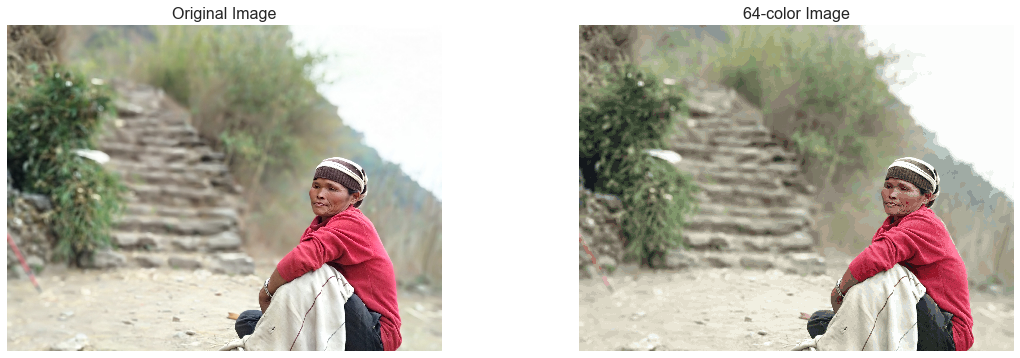

In [8]:
img_recolored = new_colors.reshape(myimg.shape)

fig, ax = plt.subplots(1, 2, figsize=(20, 6),
                       subplot_kw=dict(xticks=[], yticks=[]))
fig.subplots_adjust(wspace=0.05)
ax[0].imshow(myimg)
ax[0].set_title('Original Image', size=16)
ax[1].imshow(img_recolored)
ax[1].set_title('64-color Image', size=16);

In [9]:
plt.imsave('64-color.jpg', img_recolored)